In [1]:
import csv
import os
import random
import sys


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  pwlf

DATA_SIZE = 10000
BLOCK_SIZE = 10
FACTOR=10


In [2]:
filename = os.path.join("data//2d_lognormal_82.csv")
in_data = pd.read_csv(filename)
#in_data.drop(in_data.tail(16).index,inplace=True) # drop last n rows

In [3]:
#in_data['y'] = 1395-in_data['y']
in_data.dropna(how='all',inplace=True)

In [167]:
in_data.to_csv("data//2d_lognormal_.csv",index=False)

In [4]:
in_data

,x,y,block
1,1.0,2376.0,0.0
3,2.0,2375.0,1.0
5,3.0,2374.0,2.0
7,4.0,2373.0,3.0
9,5.0,2372.0,4.0
...,...,...,...
151,1073.0,1304.0,75.0
153,1314.0,1063.0,76.0
155,1524.0,853.0,77.0
157,1844.0,533.0,78.0


In [5]:
CellSize = 4
x_range = max(in_data.x)
y_range = max(in_data.y)
NuOfKeys = in_data.shape[0]
KeysPerCell =  NuOfKeys // (CellSize*CellSize)
print(x_range)
print(y_range)
print(NuOfKeys)
print(KeysPerCell)

2468.0
2376.0
80
5


In [20]:
KeysPerCell*CellSize

20

In [78]:
in_data_arr

array([[2.800e+01, 2.349e+03, 1.900e+01],
       [2.600e+01, 2.351e+03, 1.800e+01],
       [2.100e+01, 2.356e+03, 1.700e+01],
       [1.900e+01, 2.358e+03, 1.600e+01],
       [1.800e+01, 2.359e+03, 1.500e+01],
       [1.700e+01, 2.360e+03, 1.400e+01],
       [1.600e+01, 2.361e+03, 1.300e+01],
       [1.400e+01, 2.363e+03, 1.200e+01],
       [1.300e+01, 2.364e+03, 1.100e+01],
       [1.200e+01, 2.365e+03, 1.000e+01],
       [1.000e+01, 2.367e+03, 9.000e+00],
       [9.000e+00, 2.368e+03, 8.000e+00],
       [8.000e+00, 2.369e+03, 7.000e+00],
       [7.000e+00, 2.370e+03, 6.000e+00],
       [6.000e+00, 2.371e+03, 5.000e+00],
       [5.000e+00, 2.372e+03, 4.000e+00],
       [4.000e+00, 2.373e+03, 3.000e+00],
       [3.000e+00, 2.374e+03, 2.000e+00],
       [2.000e+00, 2.375e+03, 1.000e+00],
       [1.000e+00, 2.376e+03, 0.000e+00],
       [1.150e+02, 2.262e+03, 3.900e+01],
       [9.700e+01, 2.280e+03, 3.800e+01],
       [9.400e+01, 2.283e+03, 3.700e+01],
       [8.800e+01, 2.289e+03, 3.60

In [94]:
in_data_arr = in_data.to_numpy()

in_data_arr = in_data_arr[in_data_arr[:,0].argsort()]
# Initialize Cell Matrix, Each element of cell matrix has [(l0, u0 ), (l1, u1), Cell Id, CellId*KeysPerCell]
cellMatrix = np.zeros((CellSize*CellSize, 7))
# Divie X axis into equal no of keys, and fill x values for the cell
for i in range(CellSize):
    for j in range(CellSize):
        cellMatrix[i*CellSize+j][0] =  in_data_arr[(KeysPerCell*CellSize*(j))-(not(not(j%CellSize))) ,0]
        cellMatrix[i*CellSize+j][2] =  in_data_arr[(KeysPerCell*CellSize*(j+1)) -1 ,0]
        cellMatrix[i*CellSize+j][4] =  i*CellSize+j
        cellMatrix[i*CellSize+j][5] =  (KeysPerCell*CellSize*i)+j*KeysPerCell
        #print((KeysPerCell*CellSize*(j))-(not(not(j%CellSize))))
        #print( (KeysPerCell*CellSize*(j+1)) -1)
# Sort Keys along y direction
for i in range(CellSize):
    in_data_arr[KeysPerCell*CellSize*i:KeysPerCell*CellSize*(i+1)] = in_data_arr[(in_data_arr[KeysPerCell*CellSize*i:KeysPerCell*CellSize*(i+1),1].argsort())++KeysPerCell*CellSize*i]
# Divide the keys along y Axis
for i in range(CellSize):
    for j in range(CellSize):
        cellMatrix[i*CellSize+j][1] =  in_data_arr[((KeysPerCell*(i-1)) + (KeysPerCell*CellSize*j) +(KeysPerCell-1)) ,1]
        cellMatrix[i*CellSize+j][3] =  in_data_arr[((KeysPerCell*i) + (KeysPerCell*CellSize*j) +(KeysPerCell-1)) ,1]
        #print(((KeysPerCell*(i-1)) + (KeysPerCell*CellSize*(j)) +(KeysPerCell-1)))
        #print( ((KeysPerCell*(i)) + (KeysPerCell*CellSize*(j)) +(KeysPerCell-1)))
        cellMatrix[i*CellSize+j][6] =  ((cellMatrix[i*CellSize+j][3] - cellMatrix[i*CellSize+j][1])*
                                        (cellMatrix[i*CellSize+j][2] - cellMatrix[i*CellSize+j][0]))
for i in range(CellSize):
    cellMatrix[i][1] =  0
    cellMatrix[i][6] =  np.abs((cellMatrix[i][3] - cellMatrix[i][1])*
                     (cellMatrix[i][2] - cellMatrix[i][0]))
    

In [95]:
cellMatrix[:]

array([[1.000000e+00, 0.000000e+00, 2.800000e+01, 2.359000e+03,
        0.000000e+00, 0.000000e+00, 6.369300e+04],
       [2.800000e+01, 0.000000e+00, 1.150000e+02, 2.291000e+03,
        1.000000e+00, 5.000000e+00, 1.993170e+05],
       [1.150000e+02, 0.000000e+00, 2.700000e+02, 2.148000e+03,
        2.000000e+00, 1.000000e+01, 3.329400e+05],
       [2.700000e+02, 0.000000e+00, 2.468000e+03, 1.304000e+03,
        3.000000e+00, 1.500000e+01, 2.866192e+06],
       [1.000000e+00, 2.359000e+03, 2.800000e+01, 2.365000e+03,
        4.000000e+00, 2.000000e+01, 1.620000e+02],
       [2.800000e+01, 2.291000e+03, 1.150000e+02, 2.325000e+03,
        5.000000e+00, 2.500000e+01, 2.958000e+03],
       [1.150000e+02, 2.148000e+03, 2.700000e+02, 2.191000e+03,
        6.000000e+00, 3.000000e+01, 6.665000e+03],
       [2.700000e+02, 1.304000e+03, 2.468000e+03, 1.825000e+03,
        7.000000e+00, 3.500000e+01, 1.145158e+06],
       [1.000000e+00, 2.365000e+03, 2.800000e+01, 2.371000e+03,
        8.000000

In [97]:
in_data_arr

array([[2.800e+01, 2.349e+03, 1.900e+01],
       [2.600e+01, 2.351e+03, 1.800e+01],
       [2.100e+01, 2.356e+03, 1.700e+01],
       [1.900e+01, 2.358e+03, 1.600e+01],
       [1.800e+01, 2.359e+03, 1.500e+01],
       [1.700e+01, 2.360e+03, 1.400e+01],
       [1.600e+01, 2.361e+03, 1.300e+01],
       [1.400e+01, 2.363e+03, 1.200e+01],
       [1.300e+01, 2.364e+03, 1.100e+01],
       [1.200e+01, 2.365e+03, 1.000e+01],
       [1.000e+01, 2.367e+03, 9.000e+00],
       [9.000e+00, 2.368e+03, 8.000e+00],
       [8.000e+00, 2.369e+03, 7.000e+00],
       [7.000e+00, 2.370e+03, 6.000e+00],
       [6.000e+00, 2.371e+03, 5.000e+00],
       [5.000e+00, 2.372e+03, 4.000e+00],
       [4.000e+00, 2.373e+03, 3.000e+00],
       [3.000e+00, 2.374e+03, 2.000e+00],
       [2.000e+00, 2.375e+03, 1.000e+00],
       [1.000e+00, 2.376e+03, 0.000e+00],
       [1.150e+02, 2.262e+03, 3.900e+01],
       [9.700e+01, 2.280e+03, 3.800e+01],
       [9.400e+01, 2.283e+03, 3.700e+01],
       [8.800e+01, 2.289e+03, 3.60

In [99]:
in_data_arr =np.hstack((in_data_arr, np.zeros((in_data_arr.shape[0], 1), dtype=in_data_arr.dtype)))

In [100]:
in_data_arr.shape

(80, 4)

In [101]:
j = 0
k = 0
l = 0
for i in range(0,in_data_arr.shape[0]):
    Idx = (((i% KeysPerCell)))
    CellIdx = j*CellSize +k
    #print(' i = %d idx = %d, cellIdx = %d'%(i, Idx, CellIdx))
    KeyArea = ((in_data_arr[i][1] - cellMatrix[CellIdx][1])*
               (in_data_arr[i][0] - cellMatrix[CellIdx][0]))
     
    in_data_arr[i, 3] =   cellMatrix[CellIdx][5] + ((KeyArea/cellMatrix[CellIdx][6])*KeysPerCell)
    print('KeyArea = %d , m_v = %f' %(KeyArea, in_data_arr[i][3]))
    print('x1 = %d y1 = %d x0 = %d y0 = %d ' %(in_data_arr[i][0], in_data_arr[i][1], cellMatrix[CellIdx][0], cellMatrix[CellIdx][1]))
    if(Idx ==(KeysPerCell -1) ):
        print('\n\n')
        j  = j+1
        if(j == CellSize):
            k = k+1
            j = 0
        

KeyArea = 63423 , m_v = 4.978805
x1 = 28 y1 = 2349 x0 = 1 y0 = 0 
KeyArea = 58775 , m_v = 4.613929
x1 = 26 y1 = 2351 x0 = 1 y0 = 0 
KeyArea = 47120 , m_v = 3.698994
x1 = 21 y1 = 2356 x0 = 1 y0 = 0 
KeyArea = 42444 , m_v = 3.331920
x1 = 19 y1 = 2358 x0 = 1 y0 = 0 
KeyArea = 40103 , m_v = 3.148148
x1 = 18 y1 = 2359 x0 = 1 y0 = 0 



KeyArea = 16 , m_v = 20.493827
x1 = 17 y1 = 2360 x0 = 1 y0 = 2359 
KeyArea = 30 , m_v = 20.925926
x1 = 16 y1 = 2361 x0 = 1 y0 = 2359 
KeyArea = 52 , m_v = 21.604938
x1 = 14 y1 = 2363 x0 = 1 y0 = 2359 
KeyArea = 60 , m_v = 21.851852
x1 = 13 y1 = 2364 x0 = 1 y0 = 2359 
KeyArea = 66 , m_v = 22.037037
x1 = 12 y1 = 2365 x0 = 1 y0 = 2359 



KeyArea = 18 , m_v = 40.555556
x1 = 10 y1 = 2367 x0 = 1 y0 = 2365 
KeyArea = 24 , m_v = 40.740741
x1 = 9 y1 = 2368 x0 = 1 y0 = 2365 
KeyArea = 28 , m_v = 40.864198
x1 = 8 y1 = 2369 x0 = 1 y0 = 2365 
KeyArea = 30 , m_v = 40.925926
x1 = 7 y1 = 2370 x0 = 1 y0 = 2365 
KeyArea = 30 , m_v = 40.925926
x1 = 6 y1 = 2371 x0 = 1 y0 = 2365

In [104]:
in_data_arr

array([[2.80000000e+01, 2.34900000e+03, 1.90000000e+01, 4.97880458e+00],
       [2.60000000e+01, 2.35100000e+03, 1.80000000e+01, 4.61392932e+00],
       [2.10000000e+01, 2.35600000e+03, 1.70000000e+01, 3.69899361e+00],
       [1.90000000e+01, 2.35800000e+03, 1.60000000e+01, 3.33192031e+00],
       [1.80000000e+01, 2.35900000e+03, 1.50000000e+01, 3.14814815e+00],
       [1.70000000e+01, 2.36000000e+03, 1.40000000e+01, 2.04938272e+01],
       [1.60000000e+01, 2.36100000e+03, 1.30000000e+01, 2.09259259e+01],
       [1.40000000e+01, 2.36300000e+03, 1.20000000e+01, 2.16049383e+01],
       [1.30000000e+01, 2.36400000e+03, 1.10000000e+01, 2.18518519e+01],
       [1.20000000e+01, 2.36500000e+03, 1.00000000e+01, 2.20370370e+01],
       [1.00000000e+01, 2.36700000e+03, 9.00000000e+00, 4.05555556e+01],
       [9.00000000e+00, 2.36800000e+03, 8.00000000e+00, 4.07407407e+01],
       [8.00000000e+00, 2.36900000e+03, 7.00000000e+00, 4.08641975e+01],
       [7.00000000e+00, 2.37000000e+03, 6.00000000e

In [107]:
in_data_arr[:,3]

array([ 4.97880458,  4.61392932,  3.69899361,  3.33192031,  3.14814815,
       20.49382716, 20.92592593, 21.60493827, 21.85185185, 22.03703704,
       40.55555556, 40.74074074, 40.86419753, 40.92592593, 40.92592593,
       60.14814815, 60.22222222, 60.22222222, 60.14814815, 60.        ,
        9.93670886,  8.94647722,  8.77985822,  8.44526558,  8.33333333,
       25.09634888, 25.81135903, 25.93306288, 26.04124408, 26.37931034,
       45.09441708, 45.48850575, 45.55418719, 45.58702791, 45.57471264,
       65.05747126, 65.1532567 , 65.13409962, 65.10217114, 65.05747126,
       14.90456238, 14.7281342 , 14.69862438, 13.76892233, 13.67741935,
       30.91822956, 31.41035259, 32.19429857, 32.24531133, 32.29032258,
       50.1026393 , 51.10557185, 51.17008798, 51.29032258, 51.58064516,
       70.07395751, 70.43902439, 70.3288749 , 70.306845  , 70.25806452,
       15.00766871, 16.46351326, 16.86599851, 16.9359694 , 16.8266606 ,
       35.43854211, 35.61765276, 35.66402191, 35.69270791, 35.64

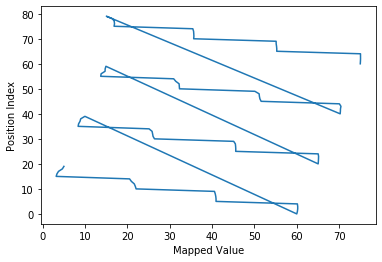

In [108]:
plt.figure(1)
plt.plot(in_data_arr[:,3], in_data_arr[:,2])
plt.xlabel('Mapped Value')
plt.ylabel('Position Index')
plt.show()

In [116]:
in_data_arr[:,3]

array([ 3.14814815,  3.33192031,  3.69899361,  4.61392932,  4.97880458,
        8.33333333,  8.44526558,  8.77985822,  8.94647722,  9.93670886,
       13.67741935, 13.76892233, 14.69862438, 14.7281342 , 14.90456238,
       15.00766871, 16.46351326, 16.8266606 , 16.86599851, 16.9359694 ,
       20.49382716, 20.92592593, 21.60493827, 21.85185185, 22.03703704,
       25.09634888, 25.81135903, 25.93306288, 26.04124408, 26.37931034,
       30.91822956, 31.41035259, 32.19429857, 32.24531133, 32.29032258,
       35.43854211, 35.61765276, 35.64149227, 35.66402191, 35.69270791,
       40.55555556, 40.74074074, 40.86419753, 40.92592593, 40.92592593,
       45.09441708, 45.48850575, 45.55418719, 45.57471264, 45.58702791,
       50.1026393 , 51.10557185, 51.17008798, 51.29032258, 51.58064516,
       55.12064788, 55.13509214, 55.22029229, 55.27070064, 55.27576659,
       60.        , 60.14814815, 60.14814815, 60.22222222, 60.22222222,
       65.05747126, 65.05747126, 65.10217114, 65.13409962, 65.15

In [110]:
in_data_arr = in_data_arr[in_data_arr[:,3].argsort()]

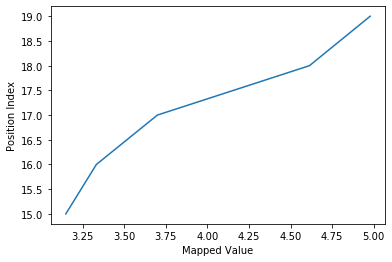

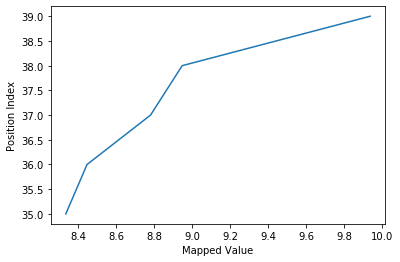

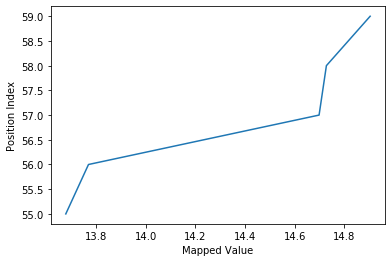

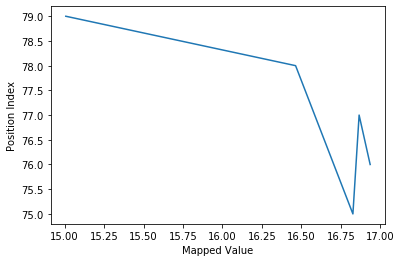

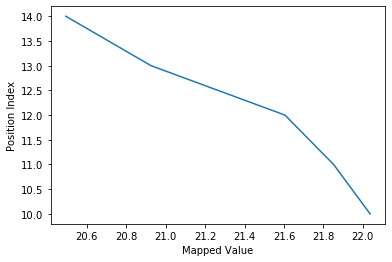

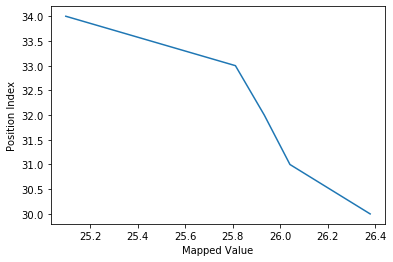

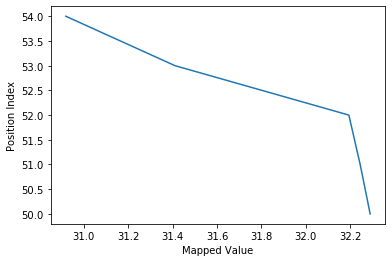

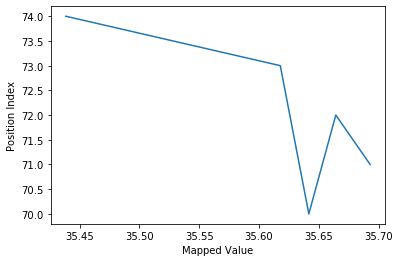

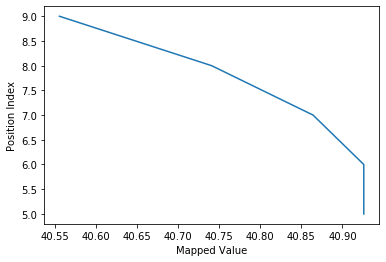

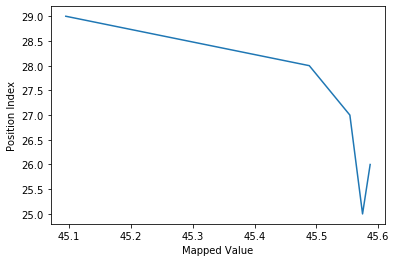

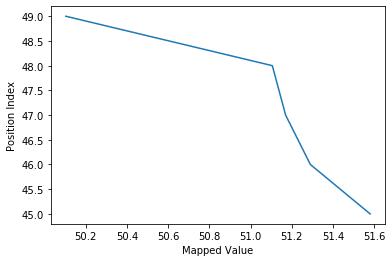

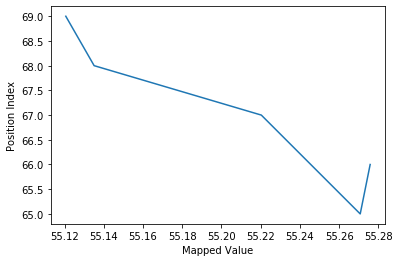

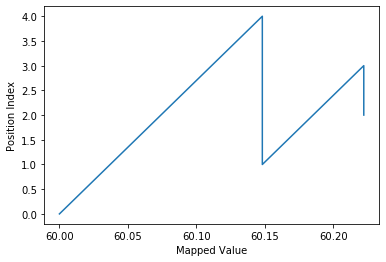

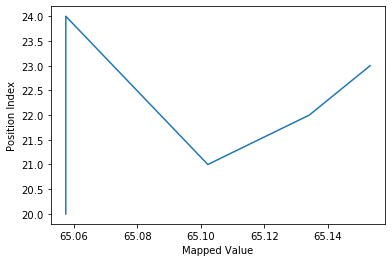

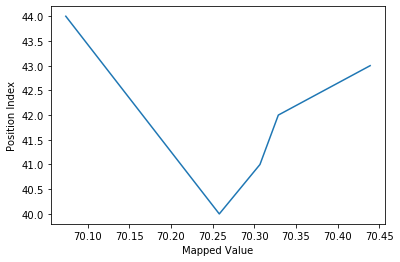

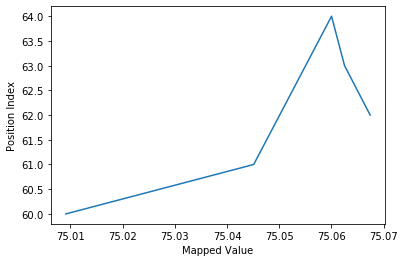

In [112]:
for i in range(CellSize*CellSize):
    plt.figure()
    plt.plot(in_data_arr[i*KeysPerCell:i*KeysPerCell+KeysPerCell,3], in_data_arr[i*KeysPerCell:i*KeysPerCell+KeysPerCell,2])
    plt.xlabel('Mapped Value')
    plt.ylabel('Position Index')
    plt.show()